This exmaple will show you how to use DeepAID Interpreter upon a SOTA NIDS *Kitsune* (NDSS'18).

We simplify the DL model to a single autoencoder for ease of illustration.

 # Prepare your DL model

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Train an autoencoder-based DL model
import numpy as np
import torch
from autoencoder import train, test, test_plot
import sys
sys.path.append('../../deepaid/')
from utils import validate_by_rmse, Normalizer
train_feat = np.load('data/train_benign_feat.npy')
normer = Normalizer(train_feat.shape[-1],online_minmax=True)
train_feat = normer.fit_transform(train_feat)
model, thres = train(train_feat, train_feat.shape[-1])
torch.save({'net':model,'thres':thres},'./save/autoencoder.pth.tar')

epoch:0/0 |Loss: 0.05268596485257149
epoch:0/10 |Loss: 0.038875702768564224
epoch:0/20 |Loss: 0.02800586447119713
epoch:0/30 |Loss: 0.019137471914291382
epoch:0/40 |Loss: 0.013119821436703205
epoch:0/50 |Loss: 0.011787918396294117
epoch:0/60 |Loss: 0.011087916791439056
epoch:0/70 |Loss: 0.016274716705083847
epoch:0/80 |Loss: 0.010826447047293186
epoch:0/90 |Loss: 0.011665377765893936
epoch:0/100 |Loss: 0.00820077396929264
epoch:0/110 |Loss: 0.0077263531275093555
epoch:0/120 |Loss: 0.006486760918051004
epoch:0/130 |Loss: 0.006559732370078564
epoch:0/140 |Loss: 0.009137896820902824
epoch:0/150 |Loss: 0.00674570444971323
epoch:0/160 |Loss: 0.005693730432540178
epoch:0/170 |Loss: 0.008413181640207767
epoch:0/180 |Loss: 0.0062520685605704784
epoch:0/190 |Loss: 0.006704980041831732
epoch:0/200 |Loss: 0.00722694955766201
epoch:0/210 |Loss: 0.007843305356800556
epoch:0/220 |Loss: 0.004778577014803886
epoch:0/230 |Loss: 0.006882736925035715
epoch:0/240 |Loss: 0.007543434388935566
epoch:0/250 |L

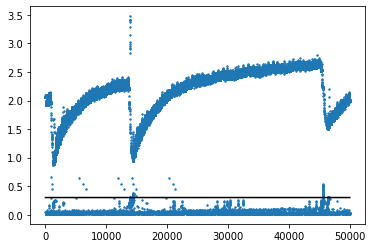

In [3]:
# Validate the performance of trained model
test_feat = np.load('data/test_mirai_ddos.npy')
test_feat = normer.transform(test_feat)
rmse_vec = test(model,thres,test_feat)
test_plot(test_feat, rmse_vec, thres) # ACC = 0.84

# Interpret your interested anomaly in four steps 

Successfully Initialize <Tabular Interptreter> for Model <autoencoder>
Finish Interpretation after 313 steps (Final loss: 0.03, Time elasped: 0.78s)

Visualize Interpretation (Table View)
+---------------------+------------------+-------+--------------------+
| Feature Description | Value in Anomaly | comp. | Value in Reference |
+---------------------+------------------+-------+--------------------+
|  MI_dir_0.1_weight  |     3245.195     |   >   |       362.81       |
|  MI_dir_0.01_weight |    23265.329     |   >   |      2130.464      |
|  MI_dir_1.0_weight  |     401.096      |   >   |       85.438       |
|  MI_dir_3.0_weight  |     180.965      |   >   |       42.905       |
|  MI_dir_5.0_weight  |     128.087      |   >   |       37.593       |
+---------------------+------------------+-------+--------------------+

Visualize Interpretation (Plot View)


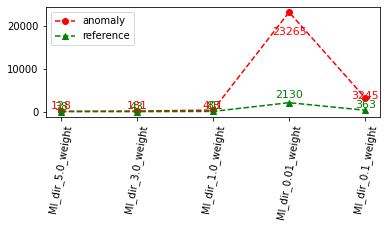


Visualize Interpretation (HeatMap View)


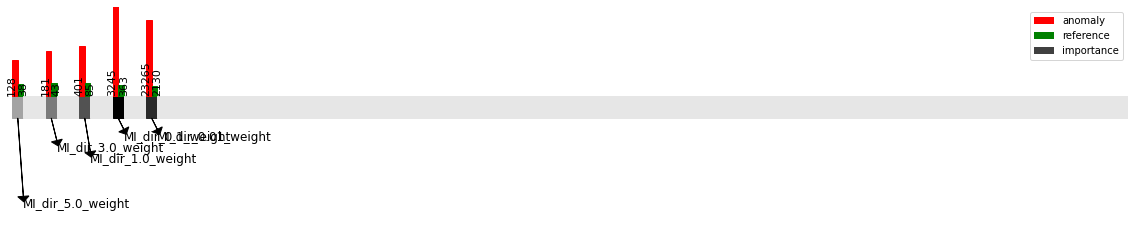

In [4]:
"""Step 1: Load your model"""
from autoencoder import autoencoder
from utils import Normalizer
model_dict = torch.load('save/autoencoder.pth.tar')
model = model_dict['net']
thres = model_dict['thres']

"""Step 2: Find an anomaly you are interested in"""
anomaly = test_feat[np.argsort(rmse_vec)[-100]]

"""Step 3: Create a DeepAID Tabular Interpreter"""
import sys
sys.path.append("../../deepaid/interpreters/")
from tabular import TabularAID
feature_desc = np.load('data/AI_feature_name.npy') # feature_description
my_interpreter = TabularAID(model,thres,input_size=100,feature_desc=feature_desc)

"""Step 4: Interpret your anomaly and show the result"""
interpretation = my_interpreter(anomaly)
# DeepAID supports three kinds of visualization of results:
my_interpreter.show_table(anomaly,interpretation, normer) 
my_interpreter.show_plot(anomaly, interpretation, normer)
my_interpreter.show_heatmap(anomaly,interpretation, normer)
